In [93]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [94]:
# Load dataset into a dataframe
data = pd.read_csv("./data/scrapped/virginwines_listings.csv")
data.head()

,name,abv,year,size (cL),country,wine_type,price,num_review,rating,url
0,Modernist Pinot Noir 2020,12.5,2020,75.0,Germany,Red,11.99,234,3.7,https://www.virginwines.co.uk/wine/Z3955810263...
1,Brio Pinot Grigio 2021,12.5,2021,75.0,Italy,White,10.99,9,4.4,https://www.virginwines.co.uk/wine/Z4194810141...
2,Ripper Shiraz 2021,14.0,2021,75.0,Australia,Red,10.99,1139,4.3,https://www.virginwines.co.uk/wine/Z4040910141...
3,Senti Prosecco Extra Dry NV,11.0,NV,75.0,Italy,Sparkling,12.99,3167,4.3,https://www.virginwines.co.uk/wine/Z3725610246...
4,Billy Bosch Highwire Chenin Blanc 2021,12.0,2021,75.0,South Africa,White,10.99,1096,4.2,https://www.virginwines.co.uk/wine/Z3964010141...


In [95]:
# IMPLEMENT THE FIX
# Rename the column name for convenience
data.rename(columns={"size (cL)" : "size"}, inplace=True)

In [96]:
# Check types of all variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        701 non-null    object 
 1   abv         701 non-null    float64
 2   year        701 non-null    object 
 3   size        701 non-null    float64
 4   country     701 non-null    object 
 5   wine_type   701 non-null    object 
 6   price       701 non-null    float64
 7   num_review  701 non-null    int64  
 8   rating      701 non-null    float64
 9   url         701 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 54.9+ KB


In [97]:
# Count NA values
data.isna().sum()

name          0
abv           0
year          0
size          0
country       0
wine_type     0
price         0
num_review    0
rating        0
url           0
dtype: int64

In [98]:
# Check number of unique values in all columns
data.nunique()

name          701
abv            29
year           16
size            4
country        19
wine_type       8
price          67
num_review    348
rating         28
url           701
dtype: int64

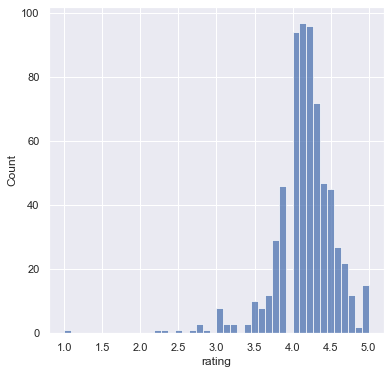

In [99]:
# Histogram plots for rating
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data.query('num_review > 0')["rating"])
plt.show()

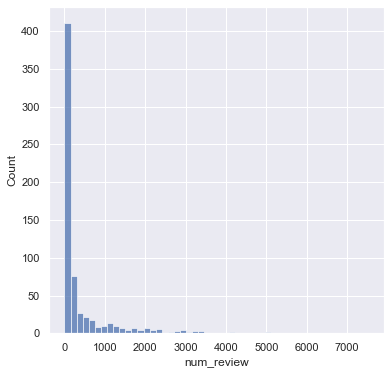

In [100]:
# Histogram plots for number of reviews. There are some extreme values at the end
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data.query('num_review > 0')["num_review"], kde=False, bins=50)
plt.show()

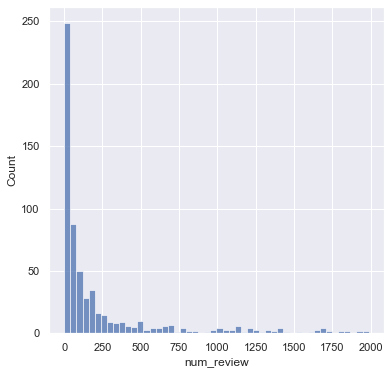

In [101]:
# Histogram plots for number of reviews, without the extreme values. Still very skewed
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data.query('num_review > 0 and num_review < 2000')["num_review"], kde=False, bins=50)
plt.show()

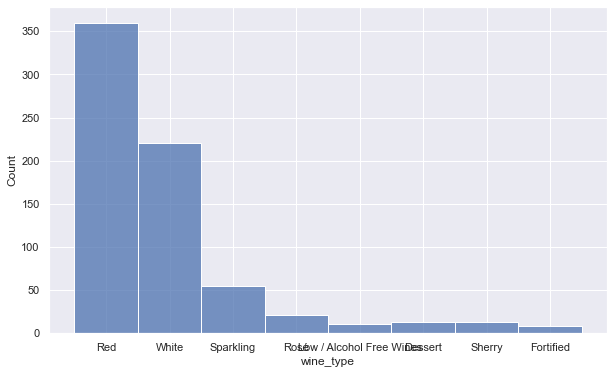

In [102]:
# Histogram plots for wine type
sns.set(rc={"figure.figsize":(10,6)})
sns.histplot(data["wine_type"])
plt.show()

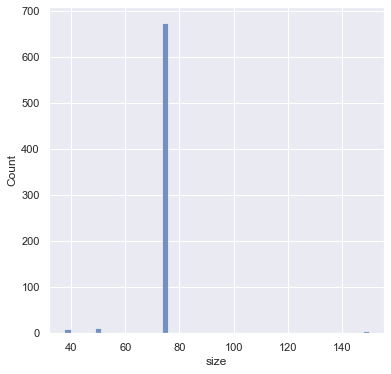

In [103]:
# Histogram plots for size
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data["size"], kde=False, bins=50)
plt.show()

In [104]:
# Number of bottles by size. Most are 75 cl.
data.groupby('size').size()

size
37.5       9
50.0      11
75.0     675
150.0      6
dtype: int64

In [105]:
# IMPLEMENT THE FIX
# Fix missing countries to unknown value
data["country"].fillna("unknown" , inplace=True)
data["country"].unique()

array(['Germany', 'Italy', 'Australia', 'South Africa', 'France', 'Chile',
       'New Zealand', 'Spain', 'USA', 'Austria', 'Portugal', 'England',
       'Lebanon', 'Hungary', 'Greece', 'Argentina', 'Romania', 'Canada',
       'Turkey'], dtype=object)

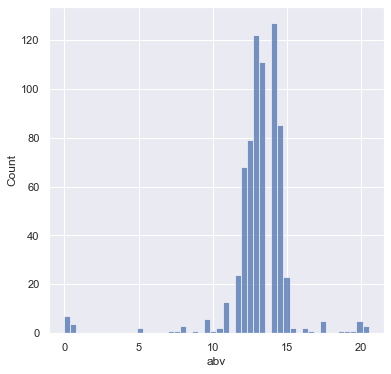

In [106]:
# Histogram plot of ABV
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data["abv"], kde=False,bins=50)
plt.show()

In [107]:
# Compute % of missing values
print('Missing pct', data["abv"].isna().sum()/len(data["abv"])*100)

Missing pct 0.0


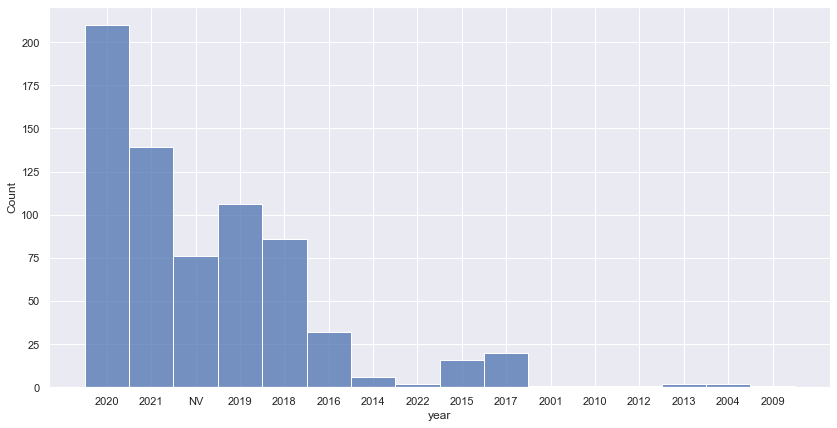

In [108]:
# Histogram plot of year
sns.set(rc={"figure.figsize":(14,7)})
sns.histplot(data["year"], bins=30)
plt.show()

In [109]:
print('Missing pct', data["year"].isna().sum()/len(data["year"])*100)

Missing pct 0.0


In [110]:
# creating country codes
import pycountry

# create a dict f country name and their codes 
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

data["countrycode"] = [countries.get(c, "unknown") for c in data["country"]]
data.head()

,name,abv,year,size,country,wine_type,price,num_review,rating,url,countrycode
0,Modernist Pinot Noir 2020,12.5,2020,75.0,Germany,Red,11.99,234,3.7,https://www.virginwines.co.uk/wine/Z3955810263...,DEU
1,Brio Pinot Grigio 2021,12.5,2021,75.0,Italy,White,10.99,9,4.4,https://www.virginwines.co.uk/wine/Z4194810141...,ITA
2,Ripper Shiraz 2021,14.0,2021,75.0,Australia,Red,10.99,1139,4.3,https://www.virginwines.co.uk/wine/Z4040910141...,AUS
3,Senti Prosecco Extra Dry NV,11.0,NV,75.0,Italy,Sparkling,12.99,3167,4.3,https://www.virginwines.co.uk/wine/Z3725610246...,ITA
4,Billy Bosch Highwire Chenin Blanc 2021,12.0,2021,75.0,South Africa,White,10.99,1096,4.2,https://www.virginwines.co.uk/wine/Z3964010141...,ZAF


In [111]:
# To scale size
for i, size in enumerate(data["size"]):
    data.loc[i, "scaledprice"] = data.loc[i, "price"] * 75 / size

data.loc[data["size"] != 75, ["size", "price", "scaledprice"]]

# Creating a new column log price as it is skewed
data.loc[:, "logprice"] = np.log10(data.loc[:,"scaledprice"])

<AxesSubplot:>

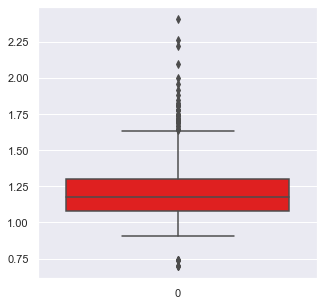

In [112]:
# price visualisation (log plot of price as the data is skewed)
sns.set(rc={"figure.figsize":(5,5)})

sns.boxplot(data=np.log10(data["scaledprice"]), color= "red")


<AxesSubplot:>

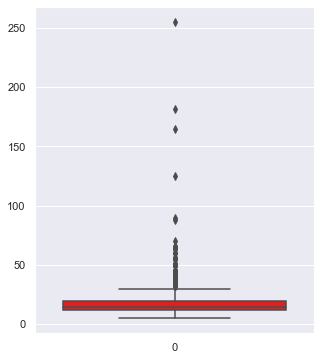

In [113]:
price_dropna = pd.to_numeric(data["price"], errors='coerce')

# price visualisation. Remove the single outlier: £26000 bottle
sns.set(rc={"figure.figsize":(5,6)})

sns.boxplot(data=price_dropna[price_dropna < 20000], color= "red")

<AxesSubplot:>

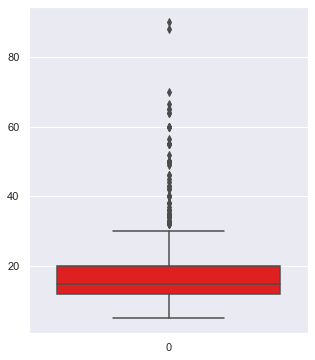

In [114]:
# price visualisation. Remove the single outlier: £26000 bottle
sns.set(rc={"figure.figsize":(5,6)})

sns.boxplot(data=price_dropna[price_dropna < 100], color= "red")


<AxesSubplot:xlabel='Count', ylabel='country'>

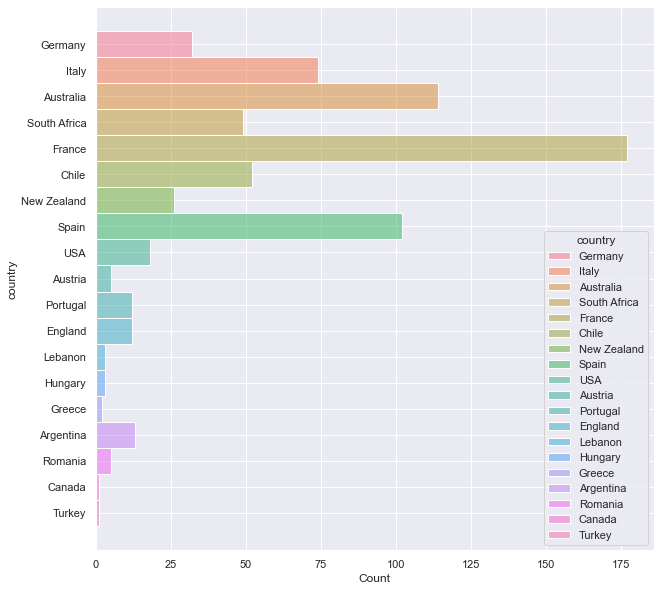

In [115]:
# Countries visualisation
# BREAK DOWN BY WINE TYPE
sns.set(rc={"figure.figsize":(10,10)})
sns.histplot(data=data, y="country", hue="country")

Text(0.5, 1.0, 'Virgin Wines Price distribution by wine category - Listed price')

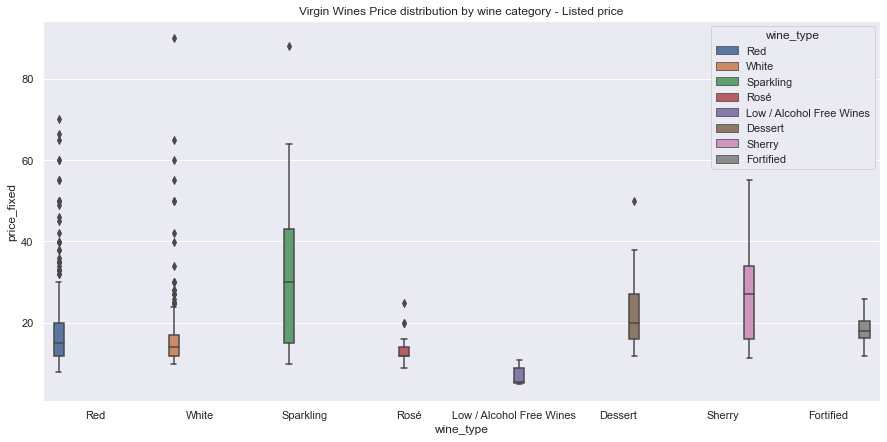

In [116]:
# plot wine type vs abs price
data['price_fixed'] = pd.to_numeric(data['price'], errors='coerce')


sns.set(rc={"figure.figsize":(15,7)})

sns.boxplot(
    data=data.query('price_fixed < 100'),
    x="wine_type", y="price_fixed", hue="wine_type"
)

plt.title('Virgin Wines Price distribution by wine category - Listed price')

Text(0.5, 1.0, 'Virgin Wines Price distribution by wine category - Log tranformed')

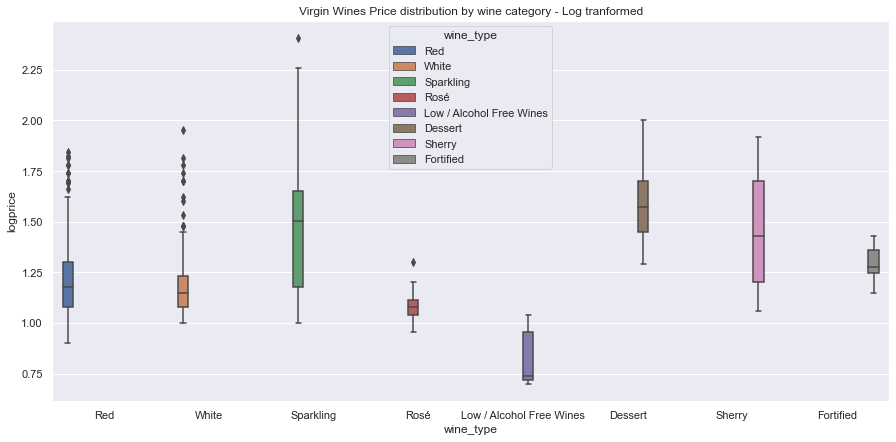

In [117]:
# plot wine type vs price

sns.set(rc={"figure.figsize":(15,7)})

sns.boxplot(
    data=data,
    x="wine_type", y="logprice", hue="wine_type"
)

plt.title('Virgin Wines Price distribution by wine category - Log tranformed')

In [118]:
def get_age(year):
    try:
        return 2022 - int(year)
    except:
        return None

# Find age
data.loc[:, "age"] = data['year'].apply(get_age)

# Creating a column with ratings >5
for i, num in enumerate(data["num_review"]):
    if num > 5:
        data.loc[i, "score"] = data.loc[i, "rating"]
    else:
        data.loc[i, "score"] = 0

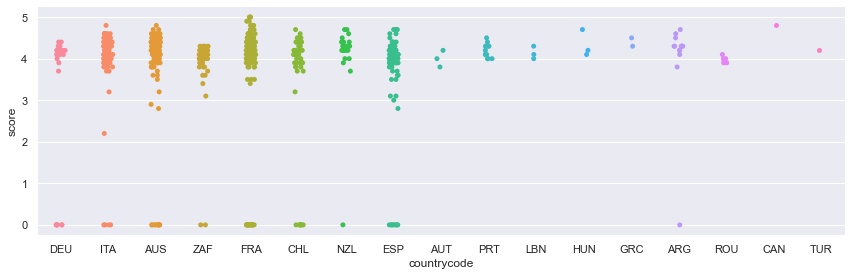

In [119]:
# plot country vs review ratings
sns.catplot(
    data=data.query('num_review > 0').loc[data["countrycode"]!="unknown"], 
    x="countrycode", 
    y="score", 
    height=4, 
    aspect=3,
)

<AxesSubplot:xlabel='age', ylabel='logprice'>

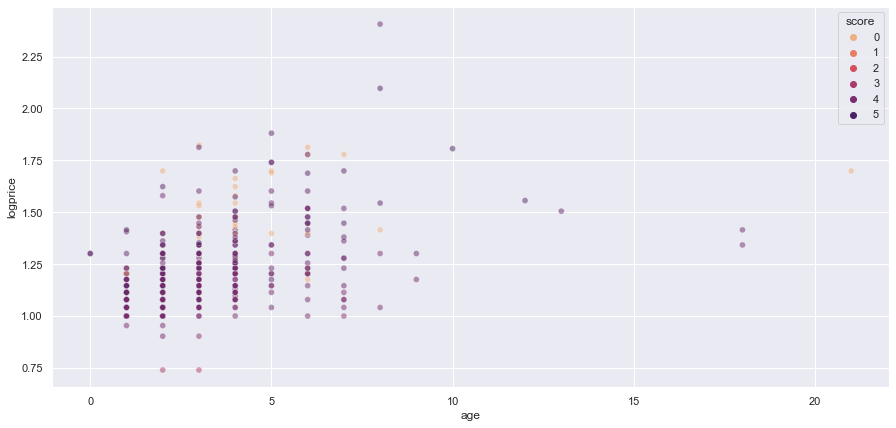

In [120]:
sns.scatterplot(
    data=data.query('num_review > 0'), 
    hue='score', 
    x='age', 
    y='logprice', 
    alpha=.5, 
    palette='flare',
)

Text(0.5, 0, 'LogPrice')

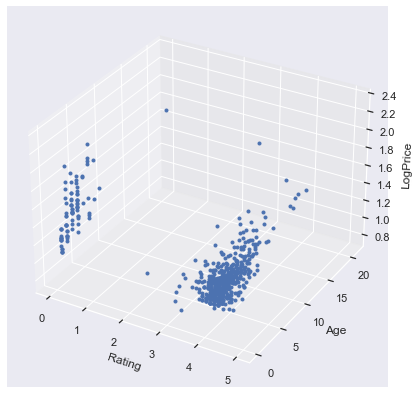

In [121]:
# Plot log price vs age and rating

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(data["score"], data["age"], data["logprice"], '.')
ax.set_xlabel("Rating")
ax.set_ylabel("Age")
ax.set_zlabel("LogPrice")

In [122]:
# Plot top 5 frequent years
topyear=data.loc[:, "year"].value_counts().sort_values(ascending=False)
top=topyear.iloc[0:5]
topy =pd.DataFrame({'year':top.index, 'count':top.values})
topy


,year,count
0,2020,210
1,2021,139
2,2019,106
3,2018,86
4,NV,76


<AxesSubplot:xlabel='year', ylabel='count'>

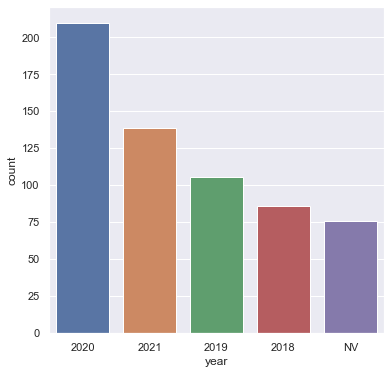

In [123]:
sns.set(rc={"figure.figsize":(6,6)})
sns.barplot(data=topy, x= "year", y = "count")

In [91]:
# Rename the column name for convenience
data.rename(columns={"size" : "size(cL)", "scaledprice" : "scaled_price" }, inplace=True)
data

,name,abv,year,size(cL),country,wine_type,price,num_review,rating,url,countrycode,scaled_price,logprice,price_fixed,age,score
0,Modernist Pinot Noir 2020,12.5,2020,75.0,Germany,Red,11.99,234,3.7,https://www.virginwines.co.uk/wine/Z3955810263...,DEU,11.99,1.078819,11.99,2.0,3.7
1,Brio Pinot Grigio 2021,12.5,2021,75.0,Italy,White,10.99,9,4.4,https://www.virginwines.co.uk/wine/Z4194810141...,ITA,10.99,1.040998,10.99,1.0,4.4
2,Ripper Shiraz 2021,14.0,2021,75.0,Australia,Red,10.99,1139,4.3,https://www.virginwines.co.uk/wine/Z4040910141...,AUS,10.99,1.040998,10.99,1.0,4.3
3,Senti Prosecco Extra Dry NV,11.0,NV,75.0,Italy,Sparkling,12.99,3167,4.3,https://www.virginwines.co.uk/wine/Z3725610246...,ITA,12.99,1.113609,12.99,NaN,4.3
4,Billy Bosch Highwire Chenin Blanc 2021,12.0,2021,75.0,South Africa,White,10.99,1096,4.2,https://www.virginwines.co.uk/wine/Z3964010141...,ZAF,10.99,1.040998,10.99,1.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,Lergenmuller Saigner Rose Trocken 2020,12.5,2020,75.0,Germany,Rosé,13.99,124,4.3,https://www.virginwines.co.uk/wine/Z3863310246...,DEU,13.99,1.145818,13.99,2.0,4.3
697,Ardido Vinho Verde DOC 2020,12.0,2020,75.0,Portugal,White,11.99,414,4.0,https://www.virginwines.co.uk/wine/Z3900610143...,PRT,11.99,1.078819,11.99,2.0,4.0
698,Tall Gum Shiraz Cabernet 2021,14.0,2021,75.0,Australia,Red,11.99,1395,4.2,https://www.virginwines.co.uk/wine/Z3984510141...,AUS,11.99,1.078819,11.99,1.0,4.2
699,Billy Bosch Pinotage Shiraz 2021,12.5,2021,75.0,South Africa,Red,10.99,762,4.2,https://www.virginwines.co.uk/wine/Z3980610000...,ZAF,10.99,1.040998,10.99,1.0,4.2


In [92]:
data.to_csv("./data/ready to merge/virginwines_to_merge.csv", index=False)